# INTRODUCTION TO SCIKIT LEARN 

## 0. An end-to-end Scikit-Learn workflow

In [1]:
# 1. Get data ready
import pandas as pd
import numpy as np
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [2]:
# Create X (feature matrix)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']
# Create y (labels)

In [3]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [5]:
clf.fit(X_train, y_train);

In [6]:
# make a prediction 
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [7]:
# 4. Evaluate the model on training data and test data
clf.score(X_train, y_train)

1.0

In [8]:
clf.score(X_test, y_test)

0.819672131147541

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80        31
           1       0.76      0.93      0.84        30

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



In [10]:
confusion_matrix(y_test, y_preds)

array([[22,  9],
       [ 2, 28]], dtype=int64)

In [11]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [12]:
# 5. Improve model 
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 101, 10):
    print(f'Trying model with {i} estimators')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%')
    print(' ')

Trying model with 10 estimators
Model accuracy on test set: 72.13%
 
Trying model with 20 estimators
Model accuracy on test set: 81.97%
 
Trying model with 30 estimators
Model accuracy on test set: 80.33%
 
Trying model with 40 estimators
Model accuracy on test set: 81.97%
 
Trying model with 50 estimators
Model accuracy on test set: 81.97%
 
Trying model with 60 estimators
Model accuracy on test set: 78.69%
 
Trying model with 70 estimators
Model accuracy on test set: 81.97%
 
Trying model with 80 estimators
Model accuracy on test set: 78.69%
 
Trying model with 90 estimators
Model accuracy on test set: 81.97%
 
Trying model with 100 estimators
Model accuracy on test set: 80.33%
 


In [13]:
# 6.- Save model and load it
import pickle
pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [14]:
loaded_model = pickle.load(open('random_forest_model_1.pkl','rb'))
loaded_model.score(X_test, y_test)

0.8032786885245902

## 1. Getting our data ready to be used in machine learning
Three main things we have to do: <br>
    1.- Split the data into features and labels (usually `X` and `Y`) <br>
    2.- Filling (also called imputing) or disregarding missing values <br>
    3.- Converting non-numerical values to numerical values (also called feature enconding)

In [15]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
y = heart_disease['target']

In [18]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

### 1.1 Make sure it's all numerical 

In [20]:
car_sales = pd.read_csv('data/car-sales-extended.csv')

In [21]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [22]:
len(car_sales)

1000

In [23]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [24]:
# split data into X/y
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

# split into training and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [27]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [28]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies.dtypes

Doors           int64
Make_BMW        uint8
Make_Honda      uint8
Make_Nissan     uint8
Make_Toyota     uint8
Colour_Black    uint8
Colour_Blue     uint8
Colour_Green    uint8
Colour_Red      uint8
Colour_White    uint8
dtype: object

In [29]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)


RandomForestRegressor()

In [30]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values
1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether.


In [31]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [32]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [33]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']
X, y

(       Make Colour  Odometer (KM)  Doors
 0     Honda  White        35431.0    4.0
 1       BMW   Blue       192714.0    5.0
 2     Honda  White        84714.0    4.0
 3    Toyota  White       154365.0    4.0
 4    Nissan   Blue       181577.0    3.0
 ..      ...    ...            ...    ...
 995  Toyota  Black        35820.0    4.0
 996     NaN  White       155144.0    3.0
 997  Nissan   Blue        66604.0    4.0
 998   Honda  White       215883.0    4.0
 999  Toyota   Blue       248360.0    4.0
 
 [1000 rows x 4 columns],
 0      15323.0
 1      19943.0
 2      28343.0
 3      13434.0
 4      14043.0
         ...   
 995    32042.0
 996     5716.0
 997    31570.0
 998     4001.0
 999    12732.0
 Name: Price, Length: 1000, dtype: float64)

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(X)

# df = pd.DataFrame(transformed_X)
# df.head()

In [35]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


#### Fill missing data with pandas


In [36]:
# car_sales_missing['Make']
car_sales_missing['Make'].fillna('missing', inplace=True)
car_sales_missing['Colour'].fillna('missing', inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

car_sales_missing['Doors'].fillna(4, inplace=True)

In [37]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [38]:
car_sales_missing.dropna(inplace=True)

In [39]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [40]:
len(car_sales_missing)

950

In [41]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']
X, y

(        Make Colour  Odometer (KM)  Doors
 0      Honda  White        35431.0    4.0
 1        BMW   Blue       192714.0    5.0
 2      Honda  White        84714.0    4.0
 3     Toyota  White       154365.0    4.0
 4     Nissan   Blue       181577.0    3.0
 ..       ...    ...            ...    ...
 995   Toyota  Black        35820.0    4.0
 996  missing  White       155144.0    3.0
 997   Nissan   Blue        66604.0    4.0
 998    Honda  White       215883.0    4.0
 999   Toyota   Blue       248360.0    4.0
 
 [950 rows x 4 columns],
 0      15323.0
 1      19943.0
 2      28343.0
 3      13434.0
 4      14043.0
         ...   
 995    32042.0
 996     5716.0
 997    31570.0
 998     4001.0
 999    12732.0
 Name: Price, Length: 950, dtype: float64)

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [43]:
dummies = pd.get_dummies(car_sales_missing)
dummies.head()

,Odometer (KM),Doors,Price,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Make_missing,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Colour_missing
0,35431.0,4.0,15323.0,0,1,0,0,0,0,0,0,0,1,0
1,192714.0,5.0,19943.0,1,0,0,0,0,0,1,0,0,0,0
2,84714.0,4.0,28343.0,0,1,0,0,0,0,0,0,0,1,0
3,154365.0,4.0,13434.0,0,0,0,1,0,0,0,0,0,1,0
4,181577.0,3.0,14043.0,0,0,1,0,0,0,1,0,0,0,0


### Option 2: Fill missing values with scikit-learn

In [44]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')

In [45]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [47]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']
X,y

(       Make Colour  Odometer (KM)  Doors
 0     Honda  White        35431.0    4.0
 1       BMW   Blue       192714.0    5.0
 2     Honda  White        84714.0    4.0
 3    Toyota  White       154365.0    4.0
 4    Nissan   Blue       181577.0    3.0
 ..      ...    ...            ...    ...
 995  Toyota  Black        35820.0    4.0
 996     NaN  White       155144.0    3.0
 997  Nissan   Blue        66604.0    4.0
 998   Honda  White       215883.0    4.0
 999  Toyota   Blue       248360.0    4.0
 
 [950 rows x 4 columns],
 0      15323.0
 1      19943.0
 2      28343.0
 3      13434.0
 4      14043.0
         ...   
 995    32042.0
 996     5716.0
 997    31570.0
 998     4001.0
 999    12732.0
 Name: Price, Length: 950, dtype: float64)

In [48]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical valus with missing & numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

#define columns 
cat_features = ['Make', "Colour"]
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([('cat_imputer', cat_imputer, cat_features),
                                ('door_imputer', door_imputer, door_features),
                             ('num_imputer', num_imputer, num_features)
                            
                            ])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [49]:
car_sales_filled = pd.DataFrame(filled_X, columns=['Make', 'Color', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Color,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [50]:
car_sales_filled.isna().sum()

Make             0
Color            0
Doors            0
Odometer (KM)    0
dtype: int64

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make', 'Color', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [52]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

## 2. Chossing the right estimator/algorithm for out problem
Scikit-learn use estimators as another term for machine learning model or algorithm


* Classification - Predicting whether a sample is one thing or another
* Regression- Predicting a number

Step 1- Check the Scikit-learn  machine learning map [LINK](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

### 2.1 Picking a machine learning model for a regression problem

In [53]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [54]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target']) 
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [55]:
len(boston_df)

506

In [56]:
from sklearn.linear_model import Ridge

np.random.seed(42)
# Create data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)
# instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)
# check the score of the ridge model on test data
model.score(X_test, y_test)


0.6662221670168522

# How do we improve the score?
# What if Ridge wasn't working?



In [57]:
# Random Forest
#Let's try the random forest regressor
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
# create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']
# split the data in test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Instatiate random forest regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# Evaluate the random forest regressor
rf.score(X_test, y_test)


0.8654448653350507

In [58]:
# check ridge model again
model.score(X_test, y_test)

0.6662221670168522

### 2.2 choosing an estimator for a clasiffication problem

In [59]:
heart_disease = pd.read_csv('data/heart-disease.csv')

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Consulting the map and it says to try linearsvc

In [60]:
from sklearn.svm import LinearSVC

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

D:\Learning\ml\sample\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [61]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Tidbit
    1.- Id you have structured data, used ensemble methods
    2.- if you have unstructured data, use deep learning or transfer learning

In [62]:

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

0.8524590163934426

In [63]:
clf.score(X_test, y_test)

0.8688524590163934

## 3. Fit the model/algorithm on our data and use it to make predictions 
### 3.1 Fitting the model to the data
* `X` = features, variables, data
* `y` = labels, targets, target variables

In [64]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)

0.8524590163934426

In [65]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [66]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# 3.2 Make predictions using a machine learning model 
2 ways to make predictions
* `predict()`
* `predict_proba()`

In [67]:
# use a trained model to make predictions
# clf.predict(X_test.iloc[0])

In [68]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
clf.predict(X_test) == np.array(y_test)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True])

In [71]:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [72]:
clf.score(X_test, y_test)

0.8688524590163934

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

Make predictions with `predict_proba()`

In [74]:
# Make predictions with predict_proba()
rfc.predict_proba(X_test[:5])




array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [75]:
rfc.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [76]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = RandomForestRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8654448653350507

In [77]:
model.predict(X_test)

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

In [78]:
y_preds = model.predict(X_test)

In [79]:
# Compore the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

# 4.- Evaluation a machine learning model

3 ways to evaluate Scikit-learn models/estimators
* Estimators `score` method.
* The `scoring` parameter.
* problem-specific metric functions.


### 4.1 Evaluating a model with `score` method

In [80]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)



0.8524590163934426

In [81]:
clf.score(X_test, y_test)

0.8524590163934426

In [82]:
clf.score(X_train, y_train)

1.0

In [83]:
# Random Forest
#Let's try the random forest regressor
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
# create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']
# split the data in test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Instatiate random forest regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# Evaluate the random forest regressor
rf.score(X_test, y_test)

0.8654448653350507

### 4.2 Evaluating a model using the `scoring`parameter

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
# create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']
# split the data in test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Instatiate random forest regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
# Evaluate the random forest regressor
rf.score(X_test, y_test)
    

0.8654448653350507

In [85]:
cross_val_score(rf, X, y, cv=5)

array([0.76095738, 0.84995578, 0.75523483, 0.45565124, 0.22320759])

In [86]:
np.random.seed(42)

clf_sigle_score = rf.score(X_test, y_test)

clf_cross_val_score = np.mean(cross_val_score(rf, X,y, cv=5))
clf_sigle_score, clf_cross_val_score

(0.8654448653350507, 0.6243870737930857)

In [87]:
# Default scoring parameter of clasisifier = mean accuracy
# clf.score()

In [88]:
cross_val_score(clf,  X, y, cv=5, scoring=None)

D:\Learning\ml\sample\env\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Learning\ml\sample\env\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Learning\ml\sample\env\lib\site-packages\sklearn\ensemble\_forest.py", line 331, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "D:\Learning\ml\sample\env\lib\site-packages\sklearn\ensemble\_forest.py", line 559, in _validate_y_class_weight
    check_classification_targets(y)
  File "D:\Learning\ml\sample\env\lib\site-packages\sklearn\utils\multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit 

array([nan, nan, nan, nan, nan])

### 4.2.1 Classification model evaluation metrics
* Accuracy
* Area under ROC curve
* Confusion matrix
* Classification reports

# Accuracy

In [89]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()

cross_val = cross_val_score(clf, X,y)

In [91]:
np.mean(cross_val)

0.8248087431693989

In [92]:
print(f'Heart Diasese Classifier Cross-validated Accuracy {np.mean(cross_val) * 100:.2f}%')

Heart Diasese Classifier Cross-validated Accuracy 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC) 
* ROC curve

ROC curves are comparison of a model's true positive rate (tpr) versus a models False positive rate (fpr).
* True positive = model predict 1 when truth is 1
* False positive = model prdict 1 when truth is 0
* True negative = model predict 0 when truth is 0
* False negative = model predict 0 when truth is 1

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2)

In [94]:
from sklearn.metrics import roc_curve
clf.fit(X_train, y_train)
#Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)


(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [95]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [96]:
# Calculate fpr, tpr, and theresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

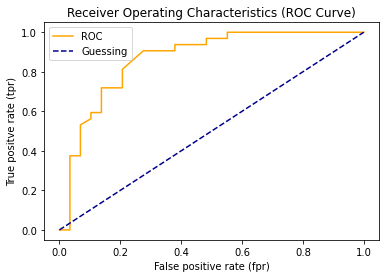

In [97]:
# Create a function for plotting ROC Curve

import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc_curve(fpr, tpr):
    """
    Plots ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    
    #plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--', label='Guessing')
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positve rate (tpr)')
    plt.title('Receiver Operating Characteristics (ROC Curve)')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [98]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)


0.8669181034482759

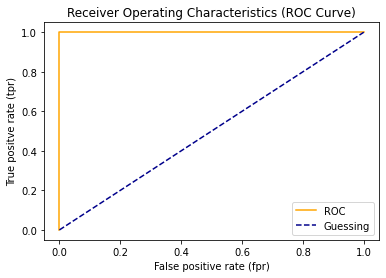

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [100]:
roc_auc_score(y_test, y_test)

1.0

**Confusion matrix**

Is a quick way to compare to compare the labels a model predicts and the actual labels it was supposed to predict. <br>
In essence giving, you an idea of where the model is getting confused.


In [101]:
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)


array([[23,  6],
       [ 6, 26]], dtype=int64)

In [102]:
# Visualize confusion matix with pd crosstab
pd.crosstab(y_test,y_preds, rownames=['Actual label'],  colnames=['Predicted labels'])

Predicted labels,0,1
Actual label,,
0,23,6
1,6,26


<AxesSubplot:>

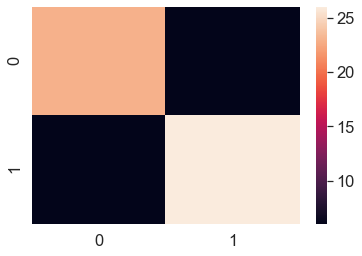

In [103]:
import seaborn as sns
# Set the font scale
sns.set(font_scale=1.5)
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_preds)
# plot using seaborn
sns.heatmap(conf_matrix)

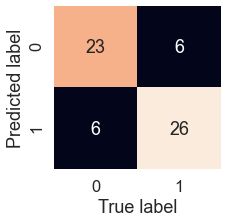

In [104]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat, annot=True, cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    plt.show()
    
plot_conf_mat(conf_matrix)

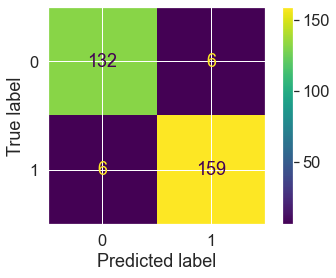

In [105]:
from sklearn.metrics import plot_confusion_matrix # This plot the confusion matrix
plot_confusion_matrix(clf, X, y);

**Classification report**

In [106]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [107]:
# Where precision and recall become valueble 
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))


D:\Learning\ml\sample\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Learning\ml\sample\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Learning\ml\sample\env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evalution metrics
[Link](https://scikit-learn.org/stable/modules/model_evaluation.html)

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

**R^2**
What R-squared does: compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1, For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [108]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)

y = boston_df['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train, y_train)


RandomForestRegressor()

In [109]:
model.score(X_test, y_test)

0.8654448653350507

In [110]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())

In [111]:
r2_score(y_test, y_test_mean)

2.220446049250313e-16

In [112]:
r2_score(y_test, y_test)

1.0

**Mean absolute error** <br>
Is the average of the absolute differences between predictions and actual values. It gives you an idea of how wrong you model predictions are 

In [113]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test,y_preds)
mae

2.136382352941176

In [114]:
df = pd.DataFrame({"actual values":y_test, "predicted values": y_preds})
df

,actual values,predicted values
173,23.6,23.081
274,32.4,30.574
491,13.6,16.759
72,22.8,23.460
452,16.1,16.893
...,...,...
412,17.9,13.159
436,9.6,12.476
411,17.2,13.612
86,22.5,20.205


In [115]:
df['differences'] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean Squered Error**  <br>

In [116]:
# MSE
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)

mse

9.867437068627442

In [117]:
# calculate mse by hand
(np.square(df['differences'])).mean()

9.867437068627439

### 4.2.3 Finally using the `scoring` parameter

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
# X_train, X_test, y_train, y_test

In [119]:
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [120]:
# Cross-validated accuracy
print(f'The cross-validated acuraccy is: {np.mean(cv_acc) *100:.2f}%')

The cross-validated acuraccy is: 82.48%


In [121]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, scoring='accuracy')
cv_acc
print(f'The cross-validated acuraccy is: {np.mean(cv_acc) *100:.2f}%')

The cross-validated acuraccy is: 82.48%


In [122]:
cv_pres = cross_val_score(clf, X, y, scoring='precision')
print(f'The cross-validated Precision is: {np.mean(cv_pres) *100:.2f}%')

The cross-validated Precision is: 80.86%


In [123]:
# Recall
cv_recall = cross_val_score(clf, X, y, scoring='recall')
print(f'The cross-validated recall is: {np.mean(cv_recall) *100:.2f}%')

The cross-validated recall is: 84.24%


In [124]:
cv_f1 = cross_val_score(clf, X, y, scoring='f1')
print(f'The cross-validated F1 is: {np.mean(cv_f1) *100:.2f}%')

The cross-validated F1 is: 84.15%


In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

X = boston_df.drop('target', axis=1)
y = boston_df['target']

model = RandomForestRegressor()

In [126]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring=None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [127]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring='r2')
cv_r2.mean()

0.6243870737930857

In [128]:
cv_mae = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [129]:
# 
cv_mse = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
cv_mse.mean()

-21.12863512415064

### 4.3 Using different evalution Metrics functions m

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


model = RandomForestClassifier()


model.fit(X_train, y_train)

# model.score(X_test, y_test)
# Make predicts

y_preds = model.predict(X_test)


print("Classifier metrics in test")


print(f'Acurracy {accuracy_score(y_test, y_preds)*100:.2f}')
print(f'Precision {precision_score(y_test, y_preds)*100:.2f}')
print(f'Recall {recall_score(y_test, y_preds)*100:.2f}')
print(f'F1 {f1_score(y_test, y_preds)*100:.2f}')

Classifier metrics in test
Acurracy 85.25
Precision 84.85
Recall 87.50
F1 86.15


In [131]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

model = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model.fit(X_train, y_train)

y_preds = model.predict(X_test)
print(f'R^2 {r2_score(y_test, y_preds)}')
print(f'MAE {mean_absolute_error(y_test, y_preds)}')
print(f'MSE {mean_squared_error(y_test, y_preds)}')

R^2 0.8654448653350507
MAE 2.136382352941176
MSE 9.867437068627442


### 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.


From a data perspective:
* Could we collect more data? (Generally, the more data, the better)
* Could we improve our data? 


From a model perspective:
* Is there a better model we could use?
* Could we improve the current model? 
<img style="width:50%" src="https://scikit-learn.org/stable/_static/ml_map.png"/>

##### Hyperparameters vs parameters
* Parameters =  Model find these patterns on data

* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

###### Three ways to adjust hyperparameters
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [132]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning hyperparameters by hand
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`


In [133]:
def evaluate_preds(y_true, y_preds):
    """
    Perfoms evaluation comparison on y_true vs y_preds labels
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    print(f'Acc { accuracy* 100:.2f}%')
    print(f'pres { precision* 100:.2f}%')
    print(f'recall {recall * 100:.2f}%')
    print(f'f1 { f1 * 100:.2f}%')
    
    
    
    return {
        "accuracy" : round(accuracy,2),
        "precision": round(precision,2),
        "recall" : round(recall,2),
        "f1" : round(f1,2)
    }

    

In [134]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [135]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease_suffled = heart_disease.sample(frac=1)

# Split in X and y

X = heart_disease_suffled.drop('target', axis=1)
y = heart_disease_suffled['target']

train_split = round(0.7 * len(heart_disease_suffled)) 
valid_split = round(train_split + 0.15 * len(heart_disease_suffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc 82.22%
pres 81.48%
recall 88.00%
f1 84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [136]:
np.random.seed(42)
clf2 = RandomForestClassifier(n_estimators=10000)
clf2.fit(X_train, y_train)

y_preds2 = clf2.predict(X_valid)

baseline_metrics2 = evaluate_preds(y_valid, y_preds2)
baseline_metrics2

Acc 82.22%
pres 81.48%
recall 88.00%
f1 84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [137]:
clf2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [138]:
np.random.seed(42)
clf3 = RandomForestClassifier(max_depth=1000)
clf3.fit(X_train, y_train)

y_preds3 = clf3.predict(X_valid)

baseline_metrics3 = evaluate_preds(y_valid, y_preds3)
baseline_metrics3

Acc 82.22%
pres 84.00%
recall 84.00%
f1 84.00%


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [139]:
np.random.seed(42)
clf4 = RandomForestClassifier(min_samples_leaf=30)
clf4.fit(X_train, y_train)

y_preds4 = clf4.predict(X_valid)

baseline_metrics4 = evaluate_preds(y_valid, y_preds4)
baseline_metrics4

Acc 82.22%
pres 79.31%
recall 92.00%
f1 85.19%


{'accuracy': 0.82, 'precision': 0.79, 'recall': 0.92, 'f1': 0.85}

In [140]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators':[10,100,200,500, 1000, 1200],
        'max_depth': [None, 5,10,20,30],
        'max_features' : ['auto', 'sqrt'],
        'min_samples_split': [2,4,6],
        'min_samples_leaf':[1,2,4]
       }

np.random.seed(42)

X = heart_disease_suffled.drop('target', axis=1)
y = heart_disease_suffled['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=-1)

#setup RandomizeSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=10, cv=5, verbose=2)

In [149]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [141]:
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   7.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

clf.fit(X_train,y_train)

In [144]:
rs_clf.score(X_test, y_test)

0.819672131147541

In [150]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [151]:
rs_y_preds = rs_clf.predict(X_test)
y_preds = clf.predict(X_test)

In [152]:
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc 81.97%
pres 77.42%
recall 85.71%
f1 81.36%


In [153]:
baseline_metics = evaluate_preds(y_test, y_preds)

Acc 77.05%
pres 71.88%
recall 82.14%
f1 76.67%


In [154]:
### 5.3 Hyperparameter tunning with GridSearchCV
grid_2 = {
    'n_estimators': [100, 200, 500],
     'max_depth': [None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_split': [6],
     'min_samples_leaf': [1, 2]
    }

In [155]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)

X = heart_disease_suffled.drop('target', axis=1)
y = heart_disease_suffled['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=-1)

#setup RandomizeSearchCV
grs_clf = GridSearchCV(estimator=clf, param_grid=grid_2, cv=5, verbose=2)

grs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [156]:
grs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [157]:
grs_y_preds = grs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, grs_y_preds)

Acc 78.69%
pres 74.19%
recall 82.14%
f1 77.97%


In [158]:
compare_metrics = pd.DataFrame({
    "baseline" : baseline_metics,
    "random search" : rs_metrics,
    'Grid Search': gs_metrics
})

<AxesSubplot:>

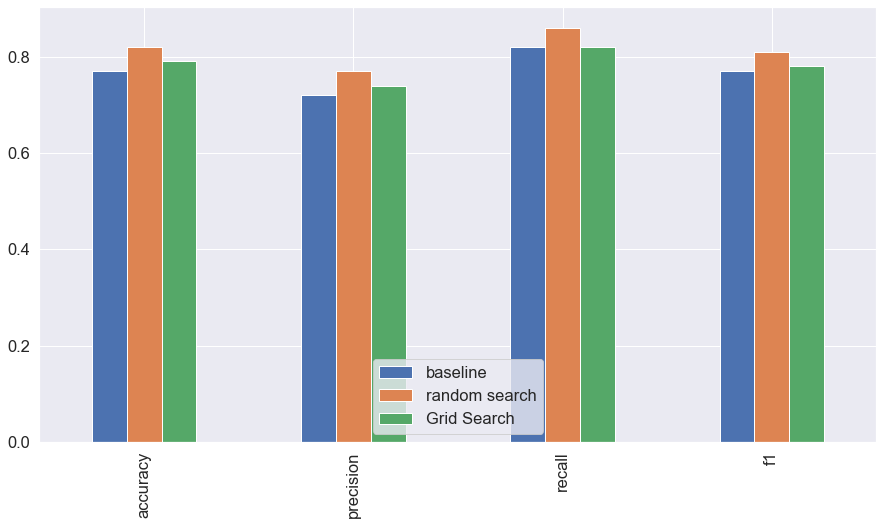

In [159]:
compare_metrics.plot.bar(figsize=(15,8))

## 6 Saving and Loading trained machine learning models
Two ways to save and load machine learning models
1.  With python's `pickle` module
2. With the `joblib` module

**Pickle**

In [160]:
import pickle
# Save an existing model to file
pickle.dump(grs_clf, open('gs_random_forest_model_1.pkl', 'wb'))

In [161]:
# load a saved model
loaded_pickle_model = pickle.load(open('gs_random_forest_model_1.pkl', 'rb'))

In [162]:
loaded_pickle_model.score(X_test,y_test)

0.7868852459016393

In [163]:
pickle_y_preds = loaded_pickle_model.predict(X_test)


### Joblib

In [165]:
from joblib import dump, load
dump(grs_clf, filename='grs_random_forest_model_1.joblib')

['grs_random_forest_model_1.joblib']

In [168]:
loaded_model_joblib = load(filename='grs_random_forest_model_1.joblib')

In [169]:
loaded_model_joblib.score(X_test, y_test)

0.7868852459016393

In [170]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_model_joblib.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc 78.69%
pres 74.19%
recall 82.14%
f1 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7. putting all together!

In [173]:
data = pd.read_csv('data/car-sales-extended-missing-data.csv')
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [174]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [175]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. convert data to numbers
3. build the model on the data

In [179]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV


# Septup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv('data/car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'], inplace=True)

# Define different features and transformer pipeline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(
                                    steps=[
                                            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                            ('onehot', OneHotEncoder(handle_unknown='ignore')),                                                                                     
                                          ]
)
door_feature = ['Doors']
door_transfomer = Pipeline(steps=[
                                  ('imputer', SimpleImputer(strategy='constant', fill_value=4))])
numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocesor = ColumnTransformer(
                                transformers=[('cat', categorical_transformer, categorical_features ),
                                              ('door', door_transfomer, door_feature),
                                              ('num', numeric_transformer, numeric_features)
                                             ]
)


# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor', preprocesor),
                        ('model', RandomForestRegressor())])


X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.22188417408787875

In [188]:
# y_preds = model.predict(X_test)
# y_preds - np.array(y_test)

It's also posible to use `GridSearchCV` or `RandomizedSearchCV` wtih our `Pipeline`

In [192]:
# Use GridSearchCV with our regression pipeline
from sklearn.model_selection import GridSearchCV
pipe_grid = {
    "preprocessor__num__imputer__strategy": ['mean', 'median'],
    'model__n_estimators': [100,1000],
    'model__max_depth':[None, 5],
    'model__max_features' : ['auto'],
    'model__min_samples_split':[2,4],
}
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)


gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.8s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [194]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'auto',
 'model__min_samples_split': 2,
 'model__n_estimators': 100,
 'preprocessor__num__imputer__strategy': 'mean'}

In [196]:
gs_model.score(X_test, y_test)

0.3339554263158365